# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains ~22k images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains ~2k images, named according to a numeric id. 

## Grading = 20 Marks

## Setup Steps

In [ ]:
! wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data_B17.zip
! unzip -qq Cat_Dog_data_B17.zip

## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially. 

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

## **Stage 1:** Define Transformations and import data

### 2 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [ ]:
image_size = (128,128)

transformations =  transforms.Compose([transforms.Resize(image_size), transforms.Grayscale(), transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

### 1 Mark -> Load the dataset with the defined transformations
 
PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
batch_size = 100 

train_set = datasets.ImageFolder(root = '/content/Cat_Dog_data/train', transform = transformations)

# YOUR CODE HERE for the DataLoader
train_loaded=torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
# # Mentors reference
# # This reference is to give how do we arrive with normalize = 0.5
# transformations =  transforms.Compose([transforms.Resize(image_size), transforms.Grayscale(), transforms.ToTensor()])
# train_set = datasets.ImageFolder(root = '/content/Cat_Dog_data/train', transform = transformations)
# mean = 0.0
# for img, _ in train_set:
#     mean += img.mean([1,2])
# mean = mean/len(train_set)
# print(mean) # This will take lot time; basic answer for this is 0.5

### 2 Marks -> Plot the 5 images of Cats and 5 images of Dogs

In [ ]:
train_set.class_to_idx

{'cat': 0, 'dog': 1}

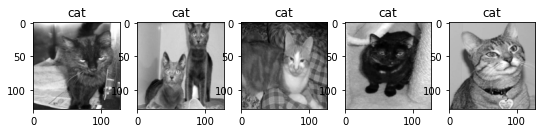

In [ ]:
# YOUR CODE HERE for plotting the images
plt.figure(figsize=(1.8 * 5, 2.4 * 2))

i=1
for idx, (images, labels) in enumerate(train_loaded):
  for index,each in enumerate(labels):
    if each.item() ==0:
      if i==6:
        break
      plt.subplot(2, 5, i)
      plt.title(train_set.classes[each.item()])
      plt.imshow(images[index][0], cmap="gray")
      i +=1

  if  i==6:
    break

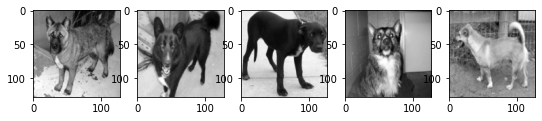

In [ ]:
# If plotting the dog images is taking more time then give shuffle=True in dataloader
plt.figure(figsize=(1.8 * 5, 2.4 * 2))

i=1
for idx, (images, labels) in enumerate(train_loaded):
  for index,each in enumerate(labels):
    if each.item() ==1:
      if i==6:
        break
      plt.subplot(1, 5, i)
      plt.imshow(images[index][0], cmap="gray")
      i +=1

  if  i==6:
    break

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.



[HInt](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/) 

### 5 Marks -> Create CNN Model


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution Layer 1 
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)

        # Convolution Layer 2
        self.cnn2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)

        # Convolution Layer 3
        self.cnn3 = nn.Conv2d(64, 128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)

        # Convolution Layer 4
        self.cnn4 = nn.Conv2d(128, 128, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(128)

        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(128*6*6, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 2)
        self.logSoftmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # Convolution Layer 1 and Maxpool
        out = self.cnn1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)

        # Convolution Layer 2 and Maxpool
        out = self.cnn2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        # Convolution Layer 3 and Maxpool
        out = self.cnn3(out)
        out = self.bn3(out)
        out = self.relu(out)
        out = self.maxpool(out)

        # Convolution Layer 4 and Maxpool
        out = self.cnn4(out)
        out = self.relu(out)
        out = self.maxpool(out)
        
        x = out.view(-1, 128*6*6)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.logSoftmax(self.fc3(x))
        return x

### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [ ]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [ ]:
model = CNNModel()
model = model.to(device)
print(model)

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

CNNModel(
  (cnn1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)


## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the dataset across each epoch.

### Expected training accuracy is above 90%

### 5 Marks -> Iterate over images in the train_loader and perform the following steps. 

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
# YOUR CODE HERE. This will take time

# Record loss and accuracy of the train dataset
num_epochs = 10

#Define the lists to store the results of loss and accuracy
train_loss, test_loss = [], []
train_accuracy, test_accuracy = [], []

for epoch in range(num_epochs): 
    correct = 0
    iter_loss = 0.0
    model.train()
    for (inputs, labels) in train_loaded:

        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad() 
        outputs = model(inputs)       
        loss = criterion(outputs, labels)  
        iter_loss += loss.item()     
        loss.backward()                
        optimizer.step()       
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
    
    train_loss.append(iter_loss/len(train_set))
    train_accuracy.append((100 * correct / len(train_set)))
    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}'.format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1]))

Epoch 1/10, Training Loss: 0.006, Training Accuracy: 69.650
Epoch 2/10, Training Loss: 0.004, Training Accuracy: 79.761
Epoch 3/10, Training Loss: 0.004, Training Accuracy: 83.805
Epoch 4/10, Training Loss: 0.003, Training Accuracy: 86.417
Epoch 5/10, Training Loss: 0.003, Training Accuracy: 87.987
Epoch 6/10, Training Loss: 0.002, Training Accuracy: 89.494
Epoch 7/10, Training Loss: 0.002, Training Accuracy: 90.031
Epoch 8/10, Training Loss: 0.002, Training Accuracy: 91.384
Epoch 9/10, Training Loss: 0.002, Training Accuracy: 92.443
Epoch 10/10, Training Loss: 0.002, Training Accuracy: 93.100


## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 92%

### 4 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count

5. Calculate the accuracy 

[Reference for Mentors](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)

# YOUR CODE HERE for the DataLoader
val_loaded = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

In [ ]:
# YOUR CODE HERE for calculating the accuracy
model.eval()
correct = 0

for images, labels in val_loaded:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()

print('Test Accuracy: %.4f %%' % (100 * correct / len(val_set)))

Test Accuracy: 90.2200 %
